In [2]:
import h5py, sys, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

In [3]:
sys.path.append('/mnt/cbis/home/benedikt/.local/dragonfly/utils/py_src')

In [4]:
import writeemc
import detector
import reademc

In [5]:
path_to_data = "../../data/sparse/" # scratch/sparse on Maxwell
path_to_aux = "../../data/aux/" # scratch/benedikt/aux on Maxwell
path_to_geometry = "../../geometry/"
path_to_recons = "../../data/recons/"

In [6]:
emc_folder = path_to_recons + "melv_0001/"
emc_output = emc_folder + "data/r4/output_001.h5"
emc_photons = emc_folder + 'photons.txt'

In [35]:
with h5py.File(emc_output,'r') as f:
    #occupancies = f['occupancies'][:]
    likelihood = f['likelihood'][:]
    orientations = f['orientations'][:]
    volume = f['intens'][0]
    scale = f['scale'][:]
    prob = f['probabilities/prob'][:]
    numrot = f['probabilities/num_rot'][:]
    place = f['probabilities/place'][:]
    blacklist = (scale == 1)
    print(list(f['probabilities']))
    print(list(f))

['num_rot', 'place', 'prob']
['intens', 'inter_weight', 'likelihood', 'mutual_info', 'orientations', 'probabilities', 'scale']


In [8]:
prob = prob[~blacklist]
place = place[~blacklist]

In [36]:
probmax = np.array([prob[i].max() if len(prob[i]) else 0. for i in range(len(prob))])
probnum = np.array([len(prob[i]) for i in range(len(prob))])

In [43]:
blacklist = (probmax < 0.9)
ndata = blacklist.shape[0] - blacklist.sum()

In [44]:
rr = 1
np.savetxt(emc_folder + "blacklist_%d_%d.dat" %(rr,ndata), blacklist, fmt='%d')

In [37]:
s = np.argsort(probmax)

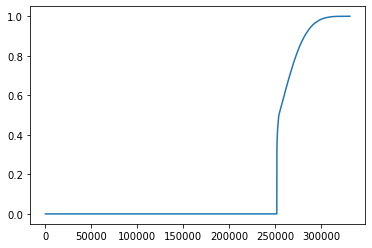

In [38]:
plt.plot(probmax[s])

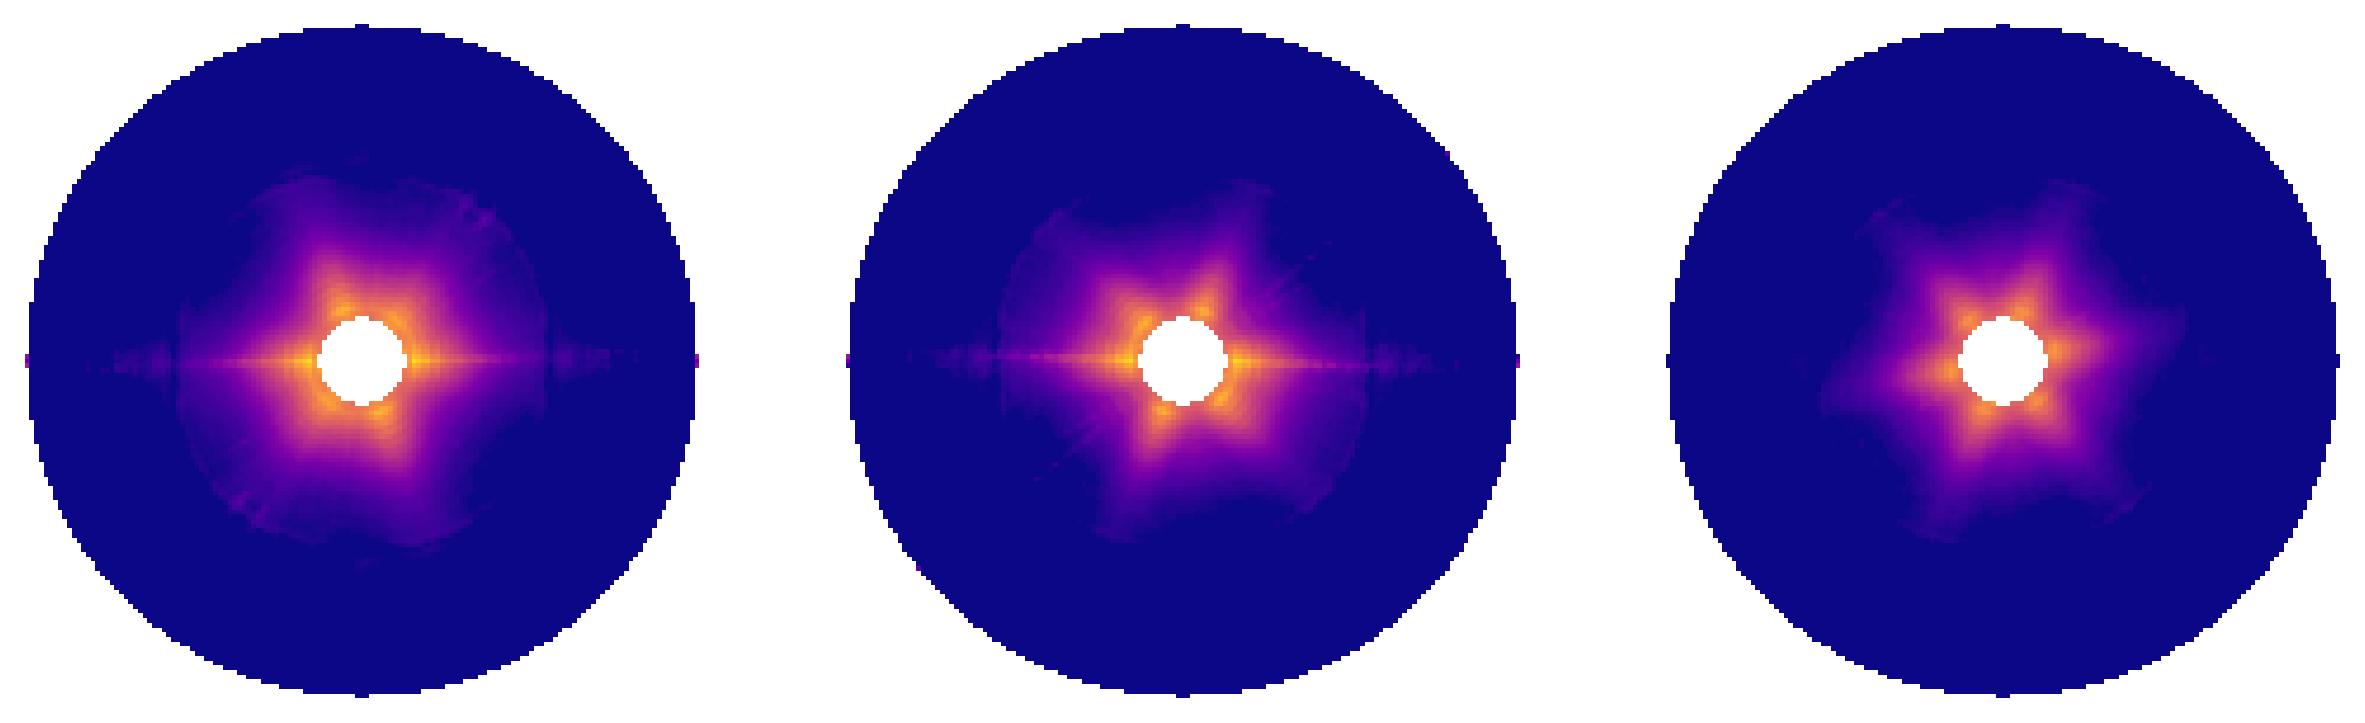

In [9]:
nx,ny,nz = volume.shape
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), dpi=200)
[ax.axis('off') for ax in axes]
axes[0].imshow(volume[nx//2],     norm=colors.LogNorm(vmin=0.01, vmax=20), cmap='plasma')
axes[1].imshow(volume[:,ny//2],   norm=colors.LogNorm(vmin=0.01, vmax=20), cmap='plasma')
axes[2].imshow(volume[:,:,nz//2], norm=colors.LogNorm(vmin=0.01, vmax=20), cmap='plasma')
plt.show()